# Problem 1

Calculate Gini and Entropy for each node/leaf in the decision tree below.  The answers are there so this should be straight forward.

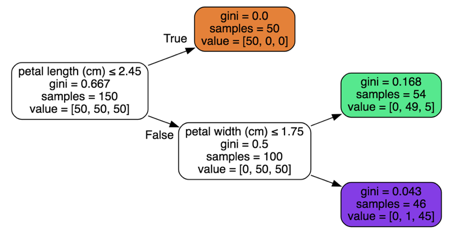

Gini
1. Green leaf: $1-\frac{49}{54}^2-\frac{5}{54}^2=0.168$
2. Purple leaf: $1-\frac{1}{46}^2-\frac{45}{46}^2=0.043$
3. Orange internal node: $1-\frac{50}{50}^2=0.0$
4. White internal node: $1-\frac{50}{100}^2-\frac{50}{100}^2=0.5$
5. Root node: $1-\frac{50}{150}^2-\frac{50}{150}^2-\frac{50}{150}^2=0.667$

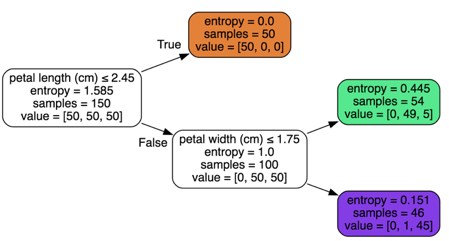

Entropy
1. Green leaf: $-(\frac{49}{54}\log_2(\frac{49}{54})+\frac{5}{54}\log_2(\frac{5}{54}))=0.445$
2. Purple leaf: $-(\frac{1}{46}\log_2(\frac{1}{46})+\frac{45}{46}\log_2(\frac{45}{46}))=0.151$
3. Orange internal node: $-\frac{50}{50}\log_2(\frac{50}{50})=0.0$
4. White internal node: $-(\frac{50}{100}\log_2(\frac{50}{100})*2=1.0$
5. Root node: $-(\frac{50}{150}\log_2(\frac{50}{150}))*3=1.585$

# Problem 2

## a.

I need a regressor model because y variable is not a categorical variable.

In [1]:
import numpy as np
import pandas as pd
import os
import re

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(1000)

## b.

Hyperparameters are max_depth 1 through 10.

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

param_grid = {'max_depth': np.arange(1, 11)}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid.get_params()
grid.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [4]:
grid.best_params_

{'max_depth': 4}

## c. Plot

In [5]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, 0, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)**2
    y_pred = tree_reg.predict(x1)
#     plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

Text(0.5,1,'max_depth=4')

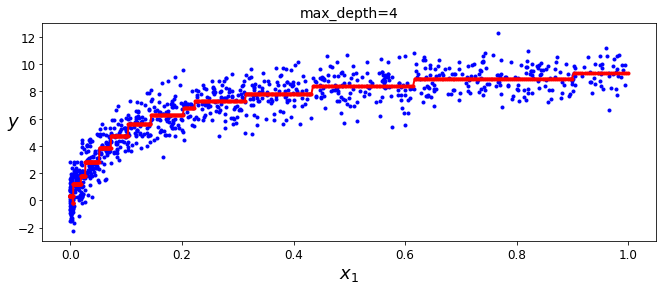

In [6]:
plt.figure(figsize=(11, 4))
plot_regression_predictions(grid.best_estimator_, X, y)
plt.title("max_depth=4", fontsize=14)

## d. 

Why doesn’t max_depth = 10 give the “best” estimate?
- As max_depth goes larger, the probability of overfitting increases. As a result, the accuracy score of training set increases but the accuracy score is low in testing set.

# Problem 3

In [7]:
df = pd.read_csv('Data.csv')

In [8]:
df.head()

,Date,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU
0,9/18/2017,109.860001,126.129997,107.269997,120.900002,56.380001,66.120003,25.059999,69.779999,58.790001,55.299999,54.189999,82.570000,89.320000,68.150002,55.250000,55.910000,69.839996,43.080002
1,9/19/2017,109.800003,125.820000,107.150002,120.970001,56.669998,66.389999,25.250000,69.849998,59.049999,55.130001,54.080002,81.919998,89.239998,68.470001,55.570000,55.650002,70.070000,43.290001
2,9/20/2017,109.709999,125.910004,106.940002,120.820000,56.869999,66.839996,25.400000,70.360001,58.810001,54.599998,53.680000,82.000000,89.540001,68.320000,55.590000,55.860001,69.699997,43.080002
3,9/21/2017,109.690002,125.839996,106.800003,120.820000,56.750000,66.860001,25.459999,70.570000,58.490002,54.080002,53.669998,81.580002,89.389999,68.180000,55.369999,55.730000,69.690002,43.110001
4,9/22/2017,109.769997,126.199997,106.989998,120.980003,56.549999,67.199997,25.430000,70.750000,58.520000,53.919998,53.230000,81.580002,89.540001,68.389999,55.430000,55.990002,69.330002,43.200001


In [9]:
df_return_cols = df.iloc[:, 1:].pct_change(1)
X = df_return_cols.iloc[-304: -2, :]

In [10]:
df_target_col = df.XLF > df.XLF.shift()
y = df_target_col.iloc[-303: -1]

In [11]:
X_train = X.head(252)
X_test = X.tail(50)
y_train = y.head(252)
y_test = y.tail(50)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# RF with default parameters
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)
score = rnd_clf.score(X_test, y_test)
print('accuracy score of RF with default parameters =', score)

accuracy score of RF with default parameters = 0.52


In [13]:
rnd_clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)>

In [14]:
for i in (5, 50, 100, 300):
    rnd_clf = RandomForestClassifier(max_depth=i, random_state=42)
#     rnd_clf = RandomForestClassifier(max_depth=i)
    rnd_clf.fit(X_train, y_train)
    score = rnd_clf.score(X_test, y_test)
    print('accuracy score of', i, 'max_depth =', score)
    
#     Use another way to calculate the accuracy score
#     y_pred_rf = rnd_clf.predict(X_test)
#     print('accuracy score of another way: ', np.sum(y_test == y_pred_rf) / len(y_test))


accuracy score of 5 max_depth = 0.58
accuracy score of 50 max_depth = 0.52
accuracy score of 100 max_depth = 0.52
accuracy score of 300 max_depth = 0.52


# Problem 4

a. Calculate the expected value of $ X_i $:
$$ E(X_i)=p\pi+(1-p)(-\pi)= (2p-1)\pi$$

b. Calculate the variance of $ X_i $:
$$ Var(X_i)=E(X_i^2)-E(X_i)^2=(p\pi^2+(1-p)(-\pi)^2)-((2p-1)\pi)^2=4\pi^2 p(1-p)$$

c. For n $iid$ bets per year, show the annualized Sharpe ratio is: $ \frac{2p-1}{2 \sqrt{p(1-p)}}\sqrt{n} $:

Aunualized Sharpe Ratio=$$\frac{r_p-r_f}{\sigma_p}\sqrt{n_{days}}=\frac{E(X_i)-0}{Var(X_i)}\sqrt{n}=\frac{(2p-1)\pi}{2\pi\sqrt{p(1-p)}}\sqrt{n}=\frac{2p-1}{2 \sqrt{p(1-p)}}\sqrt{n}$$

d. 	If $p$ is .56, how many bets per year are needed to achieve a Sharpe ratio of at least 2.0?

$$\frac{2p-1}{2 \sqrt{p(1-p)}}\sqrt{n}>=2.0$$
$$\frac{0.12}{2 \sqrt{0.2464}}\sqrt{n}>=2.0$$
$$\sqrt{n}>=4.0\frac{\sqrt{0.2464}}{0.12}$$
$$n>=274$$

In [15]:
n=(4*0.2464**0.5/0.12)**2
n

273.7777777777778